In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from matplotlib.pyplot import specgram
from IPython.display import Audio

## Loading audio files

In [2]:
import os

audio_list = os.listdir('AudioWAV/')
audio_list.sort()

In [3]:
type(audio_list)
print(len(audio_list))
print(audio_list[1])

7442
1001_DFA_DIS_XX.wav


In [4]:
audio_df = pd.DataFrame(audio_list)
audio_df = audio_df.rename(columns={0: "files"})
audio_df

files
0     1001_DFA_ANG_XX.wav
1     1001_DFA_DIS_XX.wav
2     1001_DFA_FEA_XX.wav
3     1001_DFA_HAP_XX.wav
4     1001_DFA_NEU_XX.wav
...                   ...
7437  1091_WSI_DIS_XX.wav
7438  1091_WSI_FEA_XX.wav
7439  1091_WSI_HAP_XX.wav
7440  1091_WSI_NEU_XX.wav
7441  1091_WSI_SAD_XX.wav

[7442 rows x 1 columns]

## Generate the emotion labels

In [5]:
emotion_list = []

# emotions: ANG, NEU, DIS, SAD, FEA, HAP
for item in audio_list:
    if item[9] == 'A':
        emotion_list.append('Angry')
    elif item[9] == 'N':
        emotion_list.append('Neutral')
    elif item[9] == 'D':
        emotion_list.append('Disgust')
    elif item[9] == 'S':
        emotion_list.append('Sad')
    elif item[9] == 'F':
        emotion_list.append('Fear')
    elif item[9] == 'H':
        emotion_list.append('Happy')

In [6]:
audio_list

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav',
 '1001_IEO_DIS_LO.wav',
 '1001_IEO_DIS_MD.wav',
 '1001_IEO_FEA_HI.wav',
 '1001_IEO_FEA_LO.wav',
 '1001_IEO_FEA_MD.wav',
 '1001_IEO_HAP_HI.wav',
 '1001_IEO_HAP_LO.wav',
 '1001_IEO_HAP_MD.wav',
 '1001_IEO_NEU_XX.wav',
 '1001_IEO_SAD_HI.wav',
 '1001_IEO_SAD_LO.wav',
 '1001_IEO_SAD_MD.wav',
 '1001_IOM_ANG_XX.wav',
 '1001_IOM_DIS_XX.wav',
 '1001_IOM_FEA_XX.wav',
 '1001_IOM_HAP_XX.wav',
 '1001_IOM_NEU_XX.wav',
 '1001_IOM_SAD_XX.wav',
 '1001_ITH_ANG_XX.wav',
 '1001_ITH_DIS_XX.wav',
 '1001_ITH_FEA_XX.wav',
 '1001_ITH_HAP_XX.wav',
 '1001_ITH_NEU_XX.wav',
 '1001_ITH_SAD_XX.wav',
 '1001_ITS_ANG_XX.wav',
 '1001_ITS_DIS_XX.wav',
 '1001_ITS_FEA_XX.wav',
 '1001_ITS_HAP_XX.wav',
 '1001_ITS_NEU_XX.wav',
 '1001_ITS_SAD_XX.wav',
 '1001_IWL_ANG_XX.wav',
 '1001_IWL_DIS_X

In [7]:
labels_df = pd.DataFrame(emotion_list)
labels_df = labels_df.rename(columns={0: "label"})

In [8]:
labels_df[:10] # check first 10 labels

label
0    Angry
1  Disgust
2     Fear
3    Happy
4  Neutral
5      Sad
6    Angry
7    Angry
8    Angry
9  Disgust

## Generate gender column to identify speaker

In [9]:
actor_demos = pd.read_csv('VideoDemographics.csv')
actor_demos

ActorID  Age     Sex              Race     Ethnicity
0      1001   51    Male         Caucasian  Not Hispanic
1      1002   21  Female         Caucasian  Not Hispanic
2      1003   21  Female         Caucasian  Not Hispanic
3      1004   42  Female         Caucasian  Not Hispanic
4      1005   29    Male  African American  Not Hispanic
..      ...  ...     ...               ...           ...
86     1087   62    Male         Caucasian  Not Hispanic
87     1088   23    Male  African American  Not Hispanic
88     1089   24  Female         Caucasian  Not Hispanic
89     1090   50    Male             Asian  Not Hispanic
90     1091   29  Female             Asian  Not Hispanic

[91 rows x 5 columns]

In [10]:
actor_demos.loc[(actor_demos.ActorID == 1086),:]

ActorID  Age   Sex       Race     Ethnicity
85     1086   33  Male  Caucasian  Not Hispanic

In [11]:
actor_demos.loc[(actor_demos.Age == 20),:]

ActorID  Age     Sex       Race     Ethnicity
76     1077   20    Male  Caucasian  Not Hispanic
81     1082   20  Female  Caucasian  Not Hispanic

In [12]:
female_actors = actor_demos.loc[(actor_demos.Sex == 'Female'), :]
min(female_actors.Age)

20

In [13]:
gender_list = []
female_ids = actor_demos.loc[(actor_demos.Sex == 'Female'), 'ActorID']
female_ids[:10]

1     1002
2     1003
3     1004
5     1006
6     1007
7     1008
8     1009
9     1010
11    1012
12    1013
Name: ActorID, dtype: int64

In [14]:
# get IDs of female actors
actresses_df = female_ids.to_frame()
actresses_df = actresses_df.rename(columns = {'ActorID':'FemaleID'})
actresses_df[:10]

FemaleID
1       1002
2       1003
3       1004
5       1006
6       1007
7       1008
8       1009
9       1010
11      1012
12      1013

In [15]:
audio_list[0:10]

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav']

In [16]:
audio_df['actor_id'] = audio_df['files'].apply(lambda x: x.split("_")[0]).astype(int)
audio_df

files  actor_id
0     1001_DFA_ANG_XX.wav      1001
1     1001_DFA_DIS_XX.wav      1001
2     1001_DFA_FEA_XX.wav      1001
3     1001_DFA_HAP_XX.wav      1001
4     1001_DFA_NEU_XX.wav      1001
...                   ...       ...
7437  1091_WSI_DIS_XX.wav      1091
7438  1091_WSI_FEA_XX.wav      1091
7439  1091_WSI_HAP_XX.wav      1091
7440  1091_WSI_NEU_XX.wav      1091
7441  1091_WSI_SAD_XX.wav      1091

[7442 rows x 2 columns]

In [17]:
# goal is to combine actor_id and FemaleID column based on matching values (IDs)
df_w_gender = audio_df.merge(actresses_df, how = 'left', left_on = 'actor_id', right_on = 'FemaleID')
df_w_gender

files  actor_id  FemaleID
0     1001_DFA_ANG_XX.wav      1001       NaN
1     1001_DFA_DIS_XX.wav      1001       NaN
2     1001_DFA_FEA_XX.wav      1001       NaN
3     1001_DFA_HAP_XX.wav      1001       NaN
4     1001_DFA_NEU_XX.wav      1001       NaN
...                   ...       ...       ...
7437  1091_WSI_DIS_XX.wav      1091    1091.0
7438  1091_WSI_FEA_XX.wav      1091    1091.0
7439  1091_WSI_HAP_XX.wav      1091    1091.0
7440  1091_WSI_NEU_XX.wav      1091    1091.0
7441  1091_WSI_SAD_XX.wav      1091    1091.0

[7442 rows x 3 columns]

In [18]:
print(df_w_gender.isna().sum())

files          0
actor_id       0
FemaleID    3930
dtype: int64


In [19]:
df_w_gender['gender'] = df_w_gender['FemaleID'].apply(lambda x: 'Female' if not pd.isnull(x) else 'Male')
df_w_gender = df_w_gender.drop('FemaleID', axis = 1)
df_w_gender.head()

files  actor_id gender
0  1001_DFA_ANG_XX.wav      1001   Male
1  1001_DFA_DIS_XX.wav      1001   Male
2  1001_DFA_FEA_XX.wav      1001   Male
3  1001_DFA_HAP_XX.wav      1001   Male
4  1001_DFA_NEU_XX.wav      1001   Male

Below is another method of extracting gender. I turned to the method used above instead.

part = audio_list[0].split('_')
print(int(part[0]))
part2 = audio_list[1].split('_')
print(int(part2[0]))
part10 = audio_list[9].split('_')
print(int(part10[0]))
print(part)
print(part2)
print(part10)

for i in audio_list:
    part = i.split('_')
    if int(part[0]) in female_ids:
        temp = 'female'
    else:
        temp = 'male'
    gender_list.append(temp)

gender_list[13]

## TO DO
Now I will listen to some audio files and we want to use Jake's suggested approach to remove silence as much as possible. Audio trimming by finding offset and duration values.

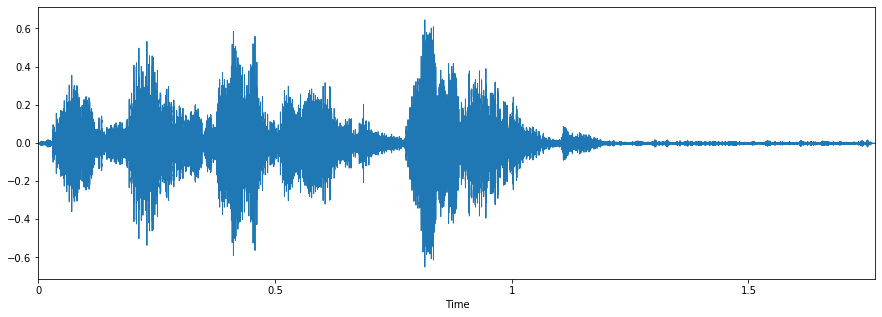

In [19]:
# let's begin by listening to a strong happy track (male)
fname = 'AudioWAV/' + '1001_IEO_HAP_HI.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
librosa.display.waveplot(data, sr = sampling_rate)

Audio(fname)

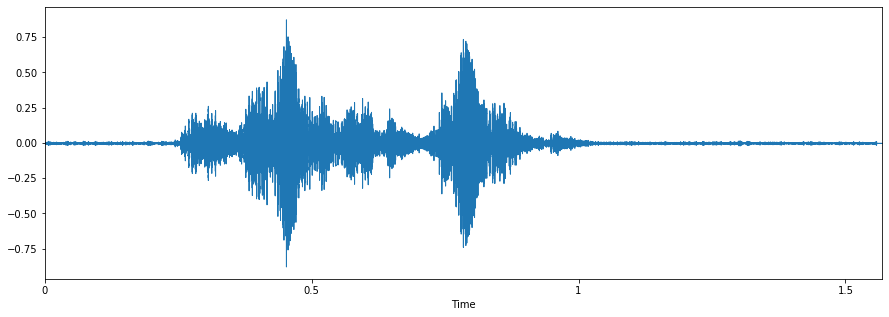

In [20]:
# try a strong fearful track (male)
fname = 'AudioWAV/' + '1001_IEO_FEA_HI.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
librosa.display.waveplot(data, sr = sampling_rate)

Audio(fname)

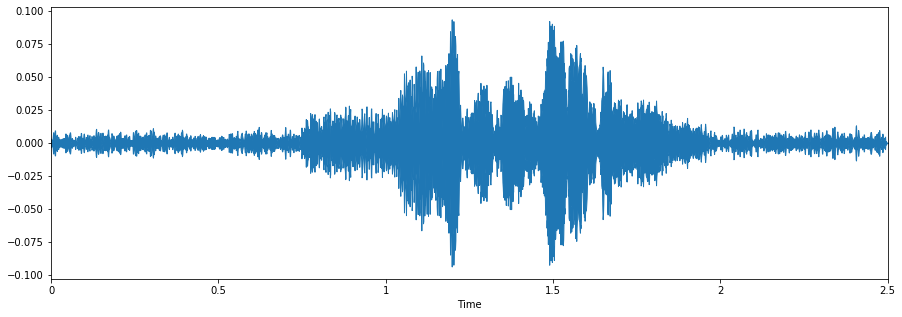

In [21]:
# what about tracks with unspecified emotion levels?
fname = 'AudioWAV/' + '1091_IOM_HAP_XX.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
librosa.display.waveplot(data, sr = sampling_rate)

Audio(fname)

# more silence in beginning of track

In [22]:
audio_df.loc[(audio_df.files == '1091_TIE_NEU_XX.wav'),:]

files  actor_id
7428  1091_TIE_NEU_XX.wav      1091

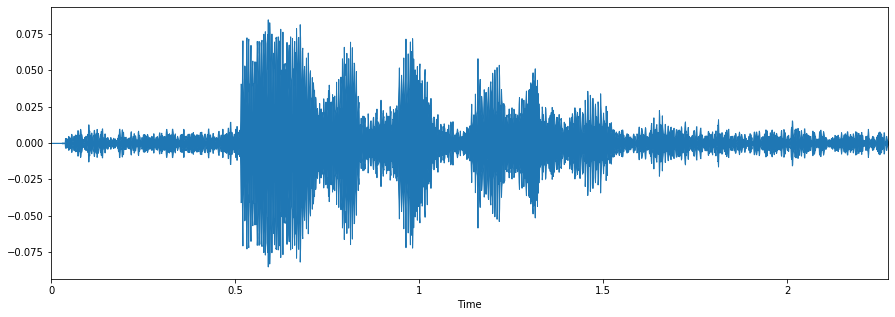

In [23]:
fname = 'AudioWAV/' + '1091_TIE_NEU_XX.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
librosa.display.waveplot(data, sr = sampling_rate)

Audio(fname)

In [24]:
data.shape

(50177,)

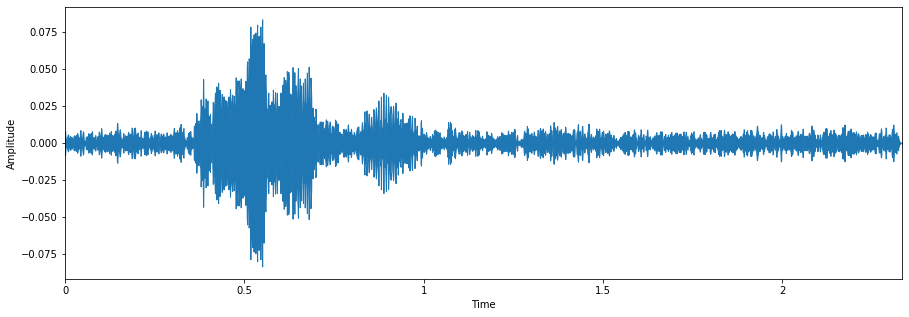

In [79]:
fname = 'AudioWAV/' + '1091_IEO_SAD_MD.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
plt.ylabel('Amplitude')
librosa.display.waveplot(data, sr = sampling_rate)

Audio(fname)

# volume may be an issue for low emotion levels
# a lot of silence near the end of track for medium sad track

In [26]:
data.shape

(51502,)

## Trimming silence

In [20]:
# trim leading and trailing silence from an audio signal for all tracks
# in trim function, adjust top_db parameter as necessary
# sample rate sr means how many samples are recorded per second
failed_to_trim = []
for index, y in enumerate(audio_list):
    
    # default librosa sample_rate is 22,050 Hz
    # load function returns time series represented as a one-dimensional numpy.ndarray of floating-point values
    
    X, sample_rate = librosa.load('AudioWAV/' + y, res_type = 'kaiser_fast') # selected res_type argument reduces load time
    print('Track', index, '# of samples', len(X)) # samples recorded on just one channel over the whole audio
    # print('Track', index, 'duration', len(X)/sample_rate) # get duration of ith audio file in seconds
       
    yt, index = librosa.effects.trim(X, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
    # print the original and trimmed durations
    
    
    if librosa.get_duration(X) == librosa.get_duration(yt):
        print('Original Duration: ', librosa.get_duration(X), 'Trimmed Duration: ', librosa.get_duration(yt))
        print('\n')
        failed_to_trim.append(index)
        
print('Number of samples the original method failed to trim: ', len(failed_to_trim))
        

Track 0 # of samples 50177
Track 1 # of samples 51502
Track 2 # of samples 47823
Track 3 # of samples 41201
Track 4 # of samples 44881
Track 5 # of samples 44145
Track 6 # of samples 42673
Track 7 # of samples 45616
Track 8 # of samples 58123
Track 9 # of samples 44145
Track 10 # of samples 44145
Track 11 # of samples 41937
Track 12 # of samples 34580
Track 13 # of samples 33844
Track 14 # of samples 35316
Track 15 # of samples 38995
Track 16 # of samples 37523
Track 17 # of samples 36787
Track 18 # of samples 35316
Track 19 # of samples 44145
Track 20 # of samples 41937
Track 21 # of samples 38259
Track 22 # of samples 47087
Track 23 # of samples 50031
Track 24 # of samples 62538
Track 25 # of samples 44145
Track 26 # of samples 54445
Track 27 # of samples 42673
Track 28 # of samples 52237
Track 29 # of samples 47823
Track 30 # of samples 46352
Track 31 # of samples 54445
Track 32 # of samples 57388
Track 33 # of samples 52237
Track 34 # of samples 56652
Track 35 # of samples 48559
Tr

Track 291 # of samples 52237
Track 292 # of samples 64745
Track 293 # of samples 58859
Track 294 # of samples 72103
Track 295 # of samples 66953
Track 296 # of samples 62538
Track 297 # of samples 72839
Track 298 # of samples 80195
Track 299 # of samples 70631
Track 300 # of samples 70631
Track 301 # of samples 81667
Track 302 # of samples 72839
Track 303 # of samples 74309
Track 304 # of samples 86081
Track 305 # of samples 64745
Track 306 # of samples 57388
Track 307 # of samples 76517
Track 308 # of samples 75781
Track 309 # of samples 62538
Track 310 # of samples 95647
Track 311 # of samples 61067
Track 312 # of samples 65481
Track 313 # of samples 51502
Track 314 # of samples 66217
Track 315 # of samples 52237
Track 316 # of samples 66953
Track 317 # of samples 64009
Track 318 # of samples 51502
Track 319 # of samples 49295
Track 320 # of samples 53709
Track 321 # of samples 66217
Track 322 # of samples 77253
Track 323 # of samples 57388
Track 324 # of samples 56652
Track 325 # of

Track 573 # of samples 68424
Track 574 # of samples 80195
Track 575 # of samples 56652
Track 576 # of samples 70631
Track 577 # of samples 52973
Track 578 # of samples 82403
Track 579 # of samples 63274
Track 580 # of samples 50766
Track 581 # of samples 56652
Track 582 # of samples 75045
Track 583 # of samples 58123
Track 584 # of samples 69159
Track 585 # of samples 66953
Track 586 # of samples 54445
Track 587 # of samples 44145
Track 588 # of samples 57388
Track 589 # of samples 48559
Track 590 # of samples 52973
Track 591 # of samples 30901
Track 592 # of samples 72103
Track 593 # of samples 64745
Track 594 # of samples 54445
Track 595 # of samples 80931
Track 596 # of samples 80195
Track 597 # of samples 83875
Track 598 # of samples 58123
Track 599 # of samples 53709
Track 600 # of samples 81667
Track 601 # of samples 93439
Track 602 # of samples 83875
Track 603 # of samples 91231
Track 604 # of samples 49295
Track 605 # of samples 68424
Track 606 # of samples 96382
Track 607 # of

Track 869 # of samples 59595
Track 870 # of samples 51502
Track 871 # of samples 76517
Track 872 # of samples 96382
Track 873 # of samples 61067
Track 874 # of samples 54445
Track 875 # of samples 50177
Track 876 # of samples 83139
Track 877 # of samples 62538
Track 878 # of samples 59595
Track 879 # of samples 57388
Track 880 # of samples 48559
Track 881 # of samples 54445
Track 882 # of samples 52973
Track 883 # of samples 76517
Track 884 # of samples 69159
Track 885 # of samples 50031
Track 886 # of samples 51502
Track 887 # of samples 64745
Track 888 # of samples 57388
Track 889 # of samples 59595
Track 890 # of samples 45616
Track 891 # of samples 45616
Track 892 # of samples 51502
Track 893 # of samples 50766
Track 894 # of samples 50031
Track 895 # of samples 47087
Track 896 # of samples 48559
Track 897 # of samples 50031
Track 898 # of samples 63274
Track 899 # of samples 50031
Track 900 # of samples 60331
Track 901 # of samples 61067
Track 902 # of samples 44145
Track 903 # of

Track 1158 # of samples 48559
Track 1159 # of samples 50177
Track 1160 # of samples 36051
Track 1161 # of samples 44145
Track 1162 # of samples 44881
Track 1163 # of samples 61803
Track 1164 # of samples 62538
Track 1165 # of samples 55917
Track 1166 # of samples 39730
Track 1167 # of samples 60331
Track 1168 # of samples 38995
Track 1169 # of samples 53709
Track 1170 # of samples 63273
Track 1171 # of samples 36787
Track 1172 # of samples 33109
Track 1173 # of samples 61803
Track 1174 # of samples 52973
Track 1175 # of samples 67688
Track 1176 # of samples 62538
Track 1177 # of samples 61067
Track 1178 # of samples 41201
Track 1179 # of samples 47823
Track 1180 # of samples 63273
Track 1181 # of samples 43409
Track 1182 # of samples 60331
Track 1183 # of samples 51502
Track 1184 # of samples 47823
Track 1185 # of samples 53709
Track 1186 # of samples 50031
Track 1187 # of samples 58123
Track 1188 # of samples 58859
Track 1189 # of samples 64009
Track 1190 # of samples 40466
Track 1191

Track 1446 # of samples 83875
Track 1447 # of samples 74309
Track 1448 # of samples 49295
Track 1449 # of samples 54445
Track 1450 # of samples 86081
Track 1451 # of samples 41937
Track 1452 # of samples 68424
Track 1453 # of samples 36787
Track 1454 # of samples 33109
Track 1455 # of samples 35316
Track 1456 # of samples 44881
Track 1457 # of samples 48559
Track 1458 # of samples 69895
Track 1459 # of samples 48559
Track 1460 # of samples 47087
Track 1461 # of samples 54445
Track 1462 # of samples 52973
Track 1463 # of samples 36787
Track 1464 # of samples 45616
Track 1465 # of samples 51502
Track 1466 # of samples 50177
Track 1467 # of samples 34580
Track 1468 # of samples 52973
Track 1469 # of samples 46352
Track 1470 # of samples 42673
Track 1471 # of samples 41201
Track 1472 # of samples 56652
Track 1473 # of samples 50177
Track 1474 # of samples 44881
Track 1475 # of samples 59595
Track 1476 # of samples 37523
Track 1477 # of samples 54445
Track 1478 # of samples 44145
Track 1479

Track 1727 # of samples 58859
Track 1728 # of samples 53709
Track 1729 # of samples 50031
Track 1730 # of samples 54445
Track 1731 # of samples 71367
Track 1732 # of samples 60331
Track 1733 # of samples 50334
Track 1734 # of samples 63274
Track 1735 # of samples 64009
Track 1736 # of samples 64745
Track 1737 # of samples 53709
Track 1738 # of samples 57388
Track 1739 # of samples 53709
Track 1740 # of samples 51502
Track 1741 # of samples 58123
Track 1742 # of samples 50766
Track 1743 # of samples 57388
Track 1744 # of samples 56652
Track 1745 # of samples 57388
Track 1746 # of samples 61803
Track 1747 # of samples 58123
Track 1748 # of samples 56652
Track 1749 # of samples 54445
Track 1750 # of samples 52973
Track 1751 # of samples 41937
Track 1752 # of samples 44145
Track 1753 # of samples 42673
Track 1754 # of samples 50031
Track 1755 # of samples 69895
Track 1756 # of samples 69895
Track 1757 # of samples 66953
Track 1758 # of samples 58123
Track 1759 # of samples 58859
Track 1760

Track 2005 # of samples 72103
Track 2006 # of samples 66953
Track 2007 # of samples 47087
Track 2008 # of samples 76517
Track 2009 # of samples 63273
Track 2010 # of samples 59595
Track 2011 # of samples 59595
Track 2012 # of samples 64745
Track 2013 # of samples 86081
Track 2014 # of samples 107418
Track 2015 # of samples 80931
Track 2016 # of samples 78725
Track 2017 # of samples 75781
Track 2018 # of samples 91967
Track 2019 # of samples 45616
Track 2020 # of samples 59595
Track 2021 # of samples 50031
Track 2022 # of samples 53709
Track 2023 # of samples 53709
Track 2024 # of samples 57388
Track 2025 # of samples 47823
Track 2026 # of samples 55917
Track 2027 # of samples 41937
Track 2028 # of samples 61067
Track 2029 # of samples 68424
Track 2030 # of samples 50031
Track 2031 # of samples 45616
Track 2032 # of samples 47087
Track 2033 # of samples 44881
Track 2034 # of samples 41201
Track 2035 # of samples 39730
Track 2036 # of samples 36787
Track 2037 # of samples 56652
Track 203

Track 2283 # of samples 46352
Track 2284 # of samples 42673
Track 2285 # of samples 33844
Track 2286 # of samples 45616
Track 2287 # of samples 45616
Track 2288 # of samples 40466
Track 2289 # of samples 41937
Track 2290 # of samples 36051
Track 2291 # of samples 38995
Track 2292 # of samples 45616
Track 2293 # of samples 33844
Track 2294 # of samples 41937
Track 2295 # of samples 52973
Track 2296 # of samples 62538
Track 2297 # of samples 38995
Track 2298 # of samples 58123
Track 2299 # of samples 41201
Track 2300 # of samples 50177
Track 2301 # of samples 40466
Track 2302 # of samples 53709
Track 2303 # of samples 40466
Track 2304 # of samples 48559
Track 2305 # of samples 59595
Track 2306 # of samples 52237
Track 2307 # of samples 48559
Track 2308 # of samples 61067
Track 2309 # of samples 53709
Track 2310 # of samples 72103
Track 2311 # of samples 51502
Track 2312 # of samples 50177
Track 2313 # of samples 51502
Track 2314 # of samples 57388
Track 2315 # of samples 41937
Track 2316

Track 2559 # of samples 60331
Track 2560 # of samples 55181
Track 2561 # of samples 55917
Track 2562 # of samples 52973
Track 2563 # of samples 75045
Track 2564 # of samples 77253
Track 2565 # of samples 66953
Track 2566 # of samples 58123
Track 2567 # of samples 55181
Track 2568 # of samples 62538
Track 2569 # of samples 64745
Track 2570 # of samples 63274
Track 2571 # of samples 57388
Track 2572 # of samples 54445
Track 2573 # of samples 58123
Track 2574 # of samples 58123
Track 2575 # of samples 69159
Track 2576 # of samples 72839
Track 2577 # of samples 68424
Track 2578 # of samples 53709
Track 2579 # of samples 53709
Track 2580 # of samples 66217
Track 2581 # of samples 66953
Track 2582 # of samples 66217
Track 2583 # of samples 62538
Track 2584 # of samples 53709
Track 2585 # of samples 62538
Track 2586 # of samples 61803
Track 2587 # of samples 87553
Track 2588 # of samples 91967
Track 2589 # of samples 83139
Track 2590 # of samples 75781
Track 2591 # of samples 56652
Track 2592

Track 2838 # of samples 64009
Track 2839 # of samples 52973
Track 2840 # of samples 65481
Track 2841 # of samples 53709
Track 2842 # of samples 58123
Track 2843 # of samples 60331
Track 2844 # of samples 65481
Track 2845 # of samples 55181
Track 2846 # of samples 69895
Track 2847 # of samples 64009
Track 2848 # of samples 55181
Track 2849 # of samples 58123
Track 2850 # of samples 59595
Track 2851 # of samples 55917
Track 2852 # of samples 55181
Track 2853 # of samples 61067
Track 2854 # of samples 44881
Track 2855 # of samples 47823
Track 2856 # of samples 58123
Track 2857 # of samples 69159
Track 2858 # of samples 47823
Track 2859 # of samples 50766
Track 2860 # of samples 62538
Track 2861 # of samples 47087
Track 2862 # of samples 44145
Track 2863 # of samples 44145
Track 2864 # of samples 42673
Track 2865 # of samples 41937
Track 2866 # of samples 44881
Track 2867 # of samples 38995
Track 2868 # of samples 40466
Track 2869 # of samples 39730
Track 2870 # of samples 65481
Track 2871

Track 3118 # of samples 48559
Track 3119 # of samples 64009
Track 3120 # of samples 67688
Track 3121 # of samples 60331
Track 3122 # of samples 52973
Track 3123 # of samples 44881
Track 3124 # of samples 58123
Track 3125 # of samples 52238
Track 3126 # of samples 71367
Track 3127 # of samples 65481
Track 3128 # of samples 61067
Track 3129 # of samples 54445
Track 3130 # of samples 61803
Track 3131 # of samples 57388
Track 3132 # of samples 64009
Track 3133 # of samples 57388
Track 3134 # of samples 50766
Track 3135 # of samples 46352
Track 3136 # of samples 58123
Track 3137 # of samples 70631
Track 3138 # of samples 67688
Track 3139 # of samples 59595
Track 3140 # of samples 50334
Track 3141 # of samples 48559
Track 3142 # of samples 62538
Track 3143 # of samples 47087
Track 3144 # of samples 54445
Track 3145 # of samples 53709
Track 3146 # of samples 52973
Track 3147 # of samples 48559
Track 3148 # of samples 60331
Track 3149 # of samples 66953
Track 3150 # of samples 69159
Track 3151

Track 3402 # of samples 55181
Track 3403 # of samples 53709
Track 3404 # of samples 50031
Track 3405 # of samples 50766
Track 3406 # of samples 45616
Track 3407 # of samples 66217
Track 3408 # of samples 59595
Track 3409 # of samples 58123
Track 3410 # of samples 55181
Track 3411 # of samples 50031
Track 3412 # of samples 69159
Track 3413 # of samples 43409
Track 3414 # of samples 32373
Track 3415 # of samples 50334
Track 3416 # of samples 54445
Track 3417 # of samples 48559
Track 3418 # of samples 41202
Track 3419 # of samples 52238
Track 3420 # of samples 55917
Track 3421 # of samples 52238
Track 3422 # of samples 50031
Track 3423 # of samples 51502
Track 3424 # of samples 52238
Track 3425 # of samples 36787
Track 3426 # of samples 50031
Track 3427 # of samples 48559
Track 3428 # of samples 38995
Track 3429 # of samples 38259
Track 3430 # of samples 50334
Track 3431 # of samples 57388
Track 3432 # of samples 44881
Track 3433 # of samples 46352
Track 3434 # of samples 51502
Track 3435

Track 3684 # of samples 41201
Track 3685 # of samples 38995
Track 3686 # of samples 38259
Track 3687 # of samples 40466
Track 3688 # of samples 38995
Track 3689 # of samples 37523
Track 3690 # of samples 50766
Track 3691 # of samples 41937
Track 3692 # of samples 45616
Track 3693 # of samples 51502
Track 3694 # of samples 55181
Track 3695 # of samples 57388
Track 3696 # of samples 41937
Track 3697 # of samples 46352
Track 3698 # of samples 41937
Track 3699 # of samples 47823
Track 3700 # of samples 53709
Track 3701 # of samples 42673
Track 3702 # of samples 46352
Track 3703 # of samples 52238
Track 3704 # of samples 52973
Track 3705 # of samples 56652
Track 3706 # of samples 50031
Track 3707 # of samples 45616
Track 3708 # of samples 47087
Track 3709 # of samples 46352
Track 3710 # of samples 50766
Track 3711 # of samples 47087
Track 3712 # of samples 50031
Track 3713 # of samples 46352
Track 3714 # of samples 44881
Track 3715 # of samples 52973
Track 3716 # of samples 50334
Track 3717

Track 3959 # of samples 55181
Track 3960 # of samples 52238
Track 3961 # of samples 53709
Track 3962 # of samples 63274
Track 3963 # of samples 50031
Track 3964 # of samples 54445
Track 3965 # of samples 50766
Track 3966 # of samples 46352
Track 3967 # of samples 48559
Track 3968 # of samples 48559
Track 3969 # of samples 68424
Track 3970 # of samples 65481
Track 3971 # of samples 66217
Track 3972 # of samples 61803
Track 3973 # of samples 56652
Track 3974 # of samples 64745
Track 3975 # of samples 58123
Track 3976 # of samples 61803
Track 3977 # of samples 52238
Track 3978 # of samples 45616
Track 3979 # of samples 47823
Track 3980 # of samples 50031
Track 3981 # of samples 58859
Track 3982 # of samples 64745
Track 3983 # of samples 66953
Track 3984 # of samples 63273
Track 3985 # of samples 61067
Track 3986 # of samples 65481
Track 3987 # of samples 43409
Track 3988 # of samples 82403
Track 3989 # of samples 58859
Track 3990 # of samples 51502
Track 3991 # of samples 39730
Track 3992

Track 4245 # of samples 38259
Track 4246 # of samples 38995
Track 4247 # of samples 41937
Track 4248 # of samples 48559
Track 4249 # of samples 36051
Track 4250 # of samples 41937
Track 4251 # of samples 58859
Track 4252 # of samples 40466
Track 4253 # of samples 45616
Track 4254 # of samples 39730
Track 4255 # of samples 43409
Track 4256 # of samples 42673
Track 4257 # of samples 44881
Track 4258 # of samples 53709
Track 4259 # of samples 46352
Track 4260 # of samples 33844
Track 4261 # of samples 36787
Track 4262 # of samples 36051
Track 4263 # of samples 40466
Track 4264 # of samples 52237
Track 4265 # of samples 40466
Track 4266 # of samples 51502
Track 4267 # of samples 48559
Track 4268 # of samples 50031
Track 4269 # of samples 38995
Track 4270 # of samples 38995
Track 4271 # of samples 35316
Track 4272 # of samples 46352
Track 4273 # of samples 48559
Track 4274 # of samples 56652
Track 4275 # of samples 42673
Track 4276 # of samples 51502
Track 4277 # of samples 47823
Track 4278

Track 4527 # of samples 59595
Track 4528 # of samples 53709
Track 4529 # of samples 46352
Track 4530 # of samples 47087
Track 4531 # of samples 55917
Track 4532 # of samples 47823
Track 4533 # of samples 52973
Track 4534 # of samples 51502
Track 4535 # of samples 45616
Track 4536 # of samples 51502
Track 4537 # of samples 45616
Track 4538 # of samples 54445
Track 4539 # of samples 44145
Track 4540 # of samples 36051
Track 4541 # of samples 38995
Track 4542 # of samples 36787
Track 4543 # of samples 58123
Track 4544 # of samples 54445
Track 4545 # of samples 50177
Track 4546 # of samples 58123
Track 4547 # of samples 47087
Track 4548 # of samples 51502
Track 4549 # of samples 47823
Track 4550 # of samples 54445
Track 4551 # of samples 40466
Track 4552 # of samples 45616
Track 4553 # of samples 32373
Track 4554 # of samples 43409
Track 4555 # of samples 72839
Track 4556 # of samples 72839
Track 4557 # of samples 69895
Track 4558 # of samples 55917
Track 4559 # of samples 57388
Track 4560

Track 4809 # of samples 39730
Track 4810 # of samples 45616
Track 4811 # of samples 52973
Track 4812 # of samples 47823
Track 4813 # of samples 53709
Track 4814 # of samples 64009
Track 4815 # of samples 53709
Track 4816 # of samples 58859
Track 4817 # of samples 49295
Track 4818 # of samples 54445
Track 4819 # of samples 48559
Track 4820 # of samples 41937
Track 4821 # of samples 50334
Track 4822 # of samples 44145
Track 4823 # of samples 50766
Track 4824 # of samples 42673
Track 4825 # of samples 54445
Track 4826 # of samples 40466
Track 4827 # of samples 44881
Track 4828 # of samples 51502
Track 4829 # of samples 52973
Track 4830 # of samples 34580
Track 4831 # of samples 45616
Track 4832 # of samples 65481
Track 4833 # of samples 58859
Track 4834 # of samples 44881
Track 4835 # of samples 41201
Track 4836 # of samples 53709
Track 4837 # of samples 57388
Track 4838 # of samples 42673
Track 4839 # of samples 63273
Track 4840 # of samples 58123
Track 4841 # of samples 55917
Track 4842

Track 5084 # of samples 55181
Track 5085 # of samples 43409
Track 5086 # of samples 44145
Track 5087 # of samples 44881
Track 5088 # of samples 53709
Track 5089 # of samples 51502
Track 5090 # of samples 36787
Track 5091 # of samples 46352
Track 5092 # of samples 52238
Track 5093 # of samples 58123
Track 5094 # of samples 72103
Track 5095 # of samples 69159
Track 5096 # of samples 51502
Track 5097 # of samples 55917
Track 5098 # of samples 50766
Track 5099 # of samples 38259
Track 5100 # of samples 54445
Track 5101 # of samples 48559
Track 5102 # of samples 39730
Track 5103 # of samples 47823
Track 5104 # of samples 36787
Track 5105 # of samples 40466
Track 5106 # of samples 64009
Track 5107 # of samples 47823
Track 5108 # of samples 53709
Track 5109 # of samples 48559
Track 5110 # of samples 57388
Track 5111 # of samples 40466
Track 5112 # of samples 44881
Track 5113 # of samples 58123
Track 5114 # of samples 41937
Track 5115 # of samples 43409
Track 5116 # of samples 43409
Track 5117

Track 5364 # of samples 63273
Track 5365 # of samples 43409
Track 5366 # of samples 47087
Track 5367 # of samples 50031
Track 5368 # of samples 51502
Track 5369 # of samples 63273
Track 5370 # of samples 56652
Track 5371 # of samples 50177
Track 5372 # of samples 41937
Track 5373 # of samples 47087
Track 5374 # of samples 55181
Track 5375 # of samples 55181
Track 5376 # of samples 58859
Track 5377 # of samples 59595
Track 5378 # of samples 50177
Track 5379 # of samples 53709
Track 5380 # of samples 64745
Track 5381 # of samples 46352
Track 5382 # of samples 67688
Track 5383 # of samples 44881
Track 5384 # of samples 43409
Track 5385 # of samples 52973
Track 5386 # of samples 55917
Track 5387 # of samples 58123
Track 5388 # of samples 63273
Track 5389 # of samples 54445
Track 5390 # of samples 63273
Track 5391 # of samples 47087
Track 5392 # of samples 69895
Track 5393 # of samples 43409
Track 5394 # of samples 48559
Track 5395 # of samples 39730
Track 5396 # of samples 44145
Track 5397

Track 5647 # of samples 50334
Track 5648 # of samples 61803
Track 5649 # of samples 53709
Track 5650 # of samples 52973
Track 5651 # of samples 56652
Track 5652 # of samples 50334
Track 5653 # of samples 47823
Track 5654 # of samples 44881
Track 5655 # of samples 41937
Track 5656 # of samples 41937
Track 5657 # of samples 55917
Track 5658 # of samples 47823
Track 5659 # of samples 52973
Track 5660 # of samples 72839
Track 5661 # of samples 58859
Track 5662 # of samples 60331
Track 5663 # of samples 50766
Track 5664 # of samples 55917
Track 5665 # of samples 58859
Track 5666 # of samples 52973
Track 5667 # of samples 54445
Track 5668 # of samples 77989
Track 5669 # of samples 66217
Track 5670 # of samples 60331
Track 5671 # of samples 61803
Track 5672 # of samples 70631
Track 5673 # of samples 61067
Track 5674 # of samples 68424
Track 5675 # of samples 47823
Track 5676 # of samples 51502
Track 5677 # of samples 58859
Track 5678 # of samples 63274
Track 5679 # of samples 59595
Track 5680

Track 5931 # of samples 50766
Track 5932 # of samples 64009
Track 5933 # of samples 64745
Track 5934 # of samples 54445
Track 5935 # of samples 50766
Track 5936 # of samples 58123
Track 5937 # of samples 58123
Track 5938 # of samples 65481
Track 5939 # of samples 58859
Track 5940 # of samples 63274
Track 5941 # of samples 58123
Track 5942 # of samples 56652
Track 5943 # of samples 56652
Track 5944 # of samples 64745
Track 5945 # of samples 59595
Track 5946 # of samples 64745
Track 5947 # of samples 59595
Track 5948 # of samples 55181
Track 5949 # of samples 44145
Track 5950 # of samples 70631
Track 5951 # of samples 60331
Track 5952 # of samples 63273
Track 5953 # of samples 50766
Track 5954 # of samples 45616
Track 5955 # of samples 54445
Track 5956 # of samples 69159
Track 5957 # of samples 53709
Track 5958 # of samples 55917
Track 5959 # of samples 53709
Track 5960 # of samples 46352
Track 5961 # of samples 61067
Track 5962 # of samples 66953
Track 5963 # of samples 66217
Track 5964

Track 6207 # of samples 60331
Track 6208 # of samples 66217
Track 6209 # of samples 47823
Track 6210 # of samples 64745
Track 6211 # of samples 64745
Track 6212 # of samples 54445
Track 6213 # of samples 47823
Track 6214 # of samples 60331
Track 6215 # of samples 54445
Track 6216 # of samples 48559
Track 6217 # of samples 42673
Track 6218 # of samples 50031
Track 6219 # of samples 47087
Track 6220 # of samples 38259
Track 6221 # of samples 50031
Track 6222 # of samples 41201
Track 6223 # of samples 38259
Track 6224 # of samples 42673
Track 6225 # of samples 44145
Track 6226 # of samples 41937
Track 6227 # of samples 54445
Track 6228 # of samples 38259
Track 6229 # of samples 50177
Track 6230 # of samples 47087
Track 6231 # of samples 62538
Track 6232 # of samples 44145
Track 6233 # of samples 58123
Track 6234 # of samples 58123
Track 6235 # of samples 56652
Track 6236 # of samples 52973
Track 6237 # of samples 58123
Track 6238 # of samples 52238
Track 6239 # of samples 48559
Track 6240

Track 6486 # of samples 77989
Track 6487 # of samples 66217
Track 6488 # of samples 77989
Track 6489 # of samples 55917
Track 6490 # of samples 66953
Track 6491 # of samples 85346
Track 6492 # of samples 52973
Track 6493 # of samples 67688
Track 6494 # of samples 72103
Track 6495 # of samples 51502
Track 6496 # of samples 66217
Track 6497 # of samples 69159
Track 6498 # of samples 75781
Track 6499 # of samples 80931
Track 6500 # of samples 77253
Track 6501 # of samples 51502
Track 6502 # of samples 66953
Track 6503 # of samples 66217
Track 6504 # of samples 59595
Track 6505 # of samples 86081
Track 6506 # of samples 59595
Track 6507 # of samples 36051
Track 6508 # of samples 58859
Track 6509 # of samples 57388
Track 6510 # of samples 53709
Track 6511 # of samples 77989
Track 6512 # of samples 58859
Track 6513 # of samples 48559
Track 6514 # of samples 68424
Track 6515 # of samples 70631
Track 6516 # of samples 66953
Track 6517 # of samples 72103
Track 6518 # of samples 53709
Track 6519

Track 6758 # of samples 68424
Track 6759 # of samples 58123
Track 6760 # of samples 59595
Track 6761 # of samples 49295
Track 6762 # of samples 58859
Track 6763 # of samples 59595
Track 6764 # of samples 45616
Track 6765 # of samples 50766
Track 6766 # of samples 37523
Track 6767 # of samples 52973
Track 6768 # of samples 74309
Track 6769 # of samples 97117
Track 6770 # of samples 69159
Track 6771 # of samples 64745
Track 6772 # of samples 64745
Track 6773 # of samples 72839
Track 6774 # of samples 61803
Track 6775 # of samples 81667
Track 6776 # of samples 58859
Track 6777 # of samples 63273
Track 6778 # of samples 62538
Track 6779 # of samples 54445
Track 6780 # of samples 52973
Track 6781 # of samples 89025
Track 6782 # of samples 72839
Track 6783 # of samples 50177
Track 6784 # of samples 50177
Track 6785 # of samples 55917
Track 6786 # of samples 50177
Track 6787 # of samples 58859
Track 6788 # of samples 45616
Track 6789 # of samples 50177
Track 6790 # of samples 42673
Track 6791

Track 7043 # of samples 69159
Track 7044 # of samples 52973
Track 7045 # of samples 44145
Track 7046 # of samples 55181
Track 7047 # of samples 67688
Track 7048 # of samples 52973
Track 7049 # of samples 72839
Track 7050 # of samples 55917
Track 7051 # of samples 67688
Track 7052 # of samples 54445
Track 7053 # of samples 62538
Track 7054 # of samples 59595
Track 7055 # of samples 55917
Track 7056 # of samples 41201
Track 7057 # of samples 39730
Track 7058 # of samples 50031
Track 7059 # of samples 40466
Track 7060 # of samples 53709
Track 7061 # of samples 51502
Track 7062 # of samples 47823
Track 7063 # of samples 40466
Track 7064 # of samples 57388
Track 7065 # of samples 50031
Track 7066 # of samples 54445
Track 7067 # of samples 69159
Track 7068 # of samples 47087
Track 7069 # of samples 44881
Track 7070 # of samples 48559
Track 7071 # of samples 59595
Track 7072 # of samples 65481
Track 7073 # of samples 72103
Track 7074 # of samples 66217
Track 7075 # of samples 54445
Track 7076

Track 7319 # of samples 72103
Track 7320 # of samples 54445
Track 7321 # of samples 57388
Track 7322 # of samples 61067
Track 7323 # of samples 56652
Track 7324 # of samples 63273
Track 7325 # of samples 50031
Track 7326 # of samples 55181
Track 7327 # of samples 48559
Track 7328 # of samples 47087
Track 7329 # of samples 63273
Track 7330 # of samples 49295
Track 7331 # of samples 83875
Track 7332 # of samples 63273
Track 7333 # of samples 61803
Track 7334 # of samples 51502
Track 7335 # of samples 60331
Track 7336 # of samples 76517
Track 7337 # of samples 66953
Track 7338 # of samples 53709
Track 7339 # of samples 52973
Track 7340 # of samples 52973
Track 7341 # of samples 55181
Track 7342 # of samples 64745
Track 7343 # of samples 88289
Track 7344 # of samples 64745
Track 7345 # of samples 54445
Track 7346 # of samples 53709
Track 7347 # of samples 84610
Track 7348 # of samples 63273
Track 7349 # of samples 72103
Track 7350 # of samples 55917
Track 7351 # of samples 56652
Track 7352

In [21]:
sample_rate

22050

In [22]:
audio_df.loc[(audio_df.index == 6969), :]

files  actor_id
6969  1086_IEO_SAD_HI.wav      1086

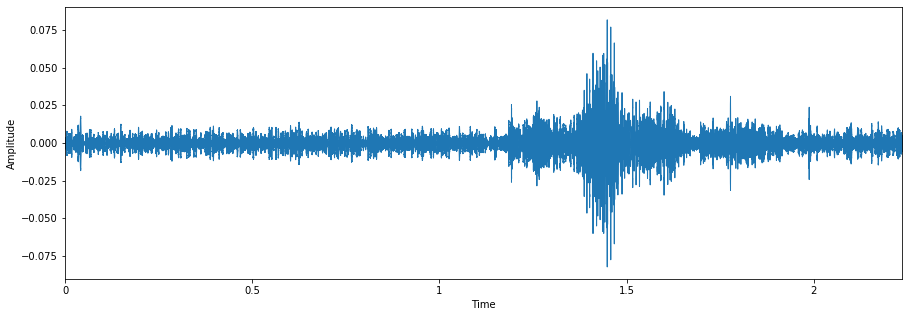

In [23]:
fname = 'AudioWAV/' + '1086_IEO_SAD_HI.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
plt.ylabel('Amplitude')
librosa.display.waveplot(data, sr = sampling_rate)

Audio(fname)

In [82]:
yt, index = librosa.effects.trim(data, top_db =20, ref=np.max, frame_length = 256, hop_length = 64)
# print the durations
print('Original Duration: ', librosa.get_duration(data), 'Trimmed Duration: ', librosa.get_duration(yt))

Audio(yt, rate = sampling_rate)

Original Duration:  2.2356009070294784 Trimmed Duration:  2.2356009070294784


Trying librosa's trim function on a single audio file.

In [29]:
audio_df.loc[(audio_df.files == '1001_DFA_FEA_XX.wav'),:]

files  actor_id
2  1001_DFA_FEA_XX.wav      1001

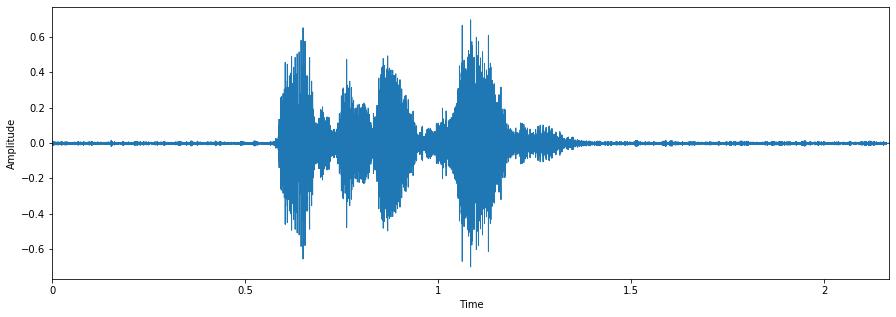

In [24]:
fname = 'AudioWAV/' + '1001_DFA_FEA_XX.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
plt.ylabel('Amplitude')
librosa.display.waveplot(data, sr = sampling_rate)

Audio(fname)

Original Duration:  2.168843537414966 Trimmed Duration:  0.7169160997732427


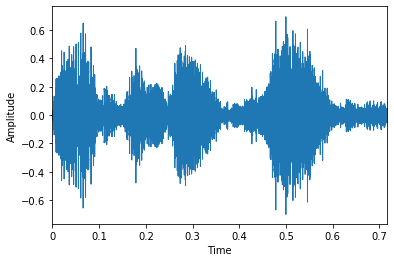

In [25]:
yt, index = librosa.effects.trim(data, top_db =20, ref=np.max, frame_length = 256, hop_length = 64)
print('Original Duration: ', librosa.get_duration(data), 'Trimmed Duration: ', librosa.get_duration(yt))
plt.ylabel('Amplitude')
librosa.display.waveplot(yt, sr = sampling_rate)
sf.write('1001_DFA_FEA_XX_trim.wav', yt, sampling_rate)

Audio(yt, rate = sampling_rate)

# PERFECTLY TRIMMED WITH 20 dB threshold

In [32]:
librosa.get_duration(data)

2.168843537414966

20 dB as silence failed to remove silence from some tracks such as track 7381. 

In [33]:
audio_df.loc[(audio_df.files == '1091_IEO_SAD_MD.wav'),:]

files  actor_id
7381  1091_IEO_SAD_MD.wav      1091

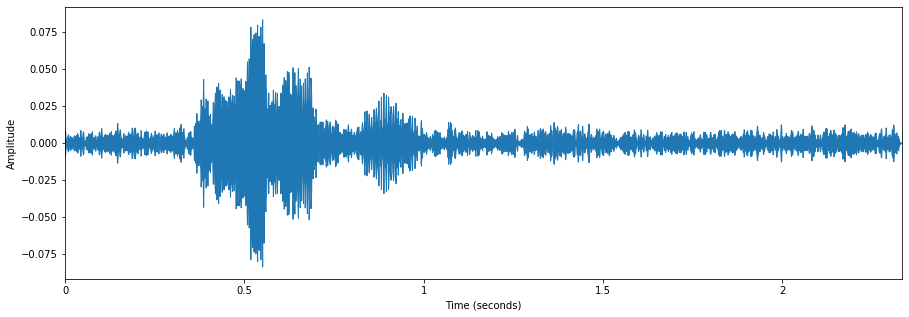

In [26]:
fname = 'AudioWAV/' + '1091_IEO_SAD_MD.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
librosa.display.waveplot(data, sr = sampling_rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

Audio(fname)

Original Duration:  2.3356916099773244 Trimmed Duration:  2.3356916099773244


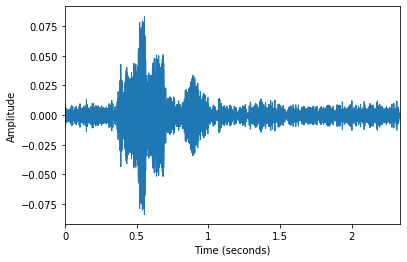

In [27]:
yt, index = librosa.effects.trim(data, top_db = 60) # default dB does not help fix the issue
# print the durations
print('Original Duration: ', librosa.get_duration(data), 'Trimmed Duration: ', librosa.get_duration(yt))

librosa.display.waveplot(yt, sr = sampling_rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

Audio(yt, rate = sampling_rate)

In [36]:
# short time fourier transform
# (n_fft and hop length determine frequency/time resolution)
n_fft = 2048
S = librosa.stft(data, n_fft=n_fft, hop_length=n_fft//2)
print(S.shape)
# convert to db
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
np.max(abs(D))

(1025, 51)


80.0

Original Duration:  2.3356916099773244 Trimmed Duration:  2.29297052154195


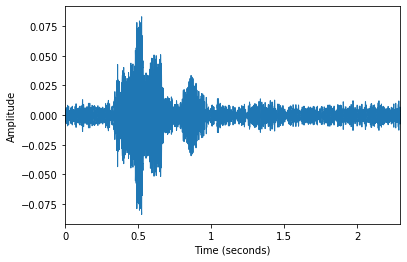

In [28]:
yt2, index2 = librosa.effects.trim(data, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
print('Original Duration: ', librosa.get_duration(data), 'Trimmed Duration: ', librosa.get_duration(yt2))

librosa.display.waveplot(yt2, sr = sampling_rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

sf.write('1091_IEO_SAD_MD_trim.wav', yt2, sampling_rate)
Audio(yt2, rate = sampling_rate)

Not exactly perfect trimming because the beginning of the sentence is slightly cut off.

In [38]:
audio_df.loc[(audio_df.files == '1091_IOM_HAP_XX.wav'),:]

files  actor_id
7385  1091_IOM_HAP_XX.wav      1091

Let's try the new method of trimming with track 7385.

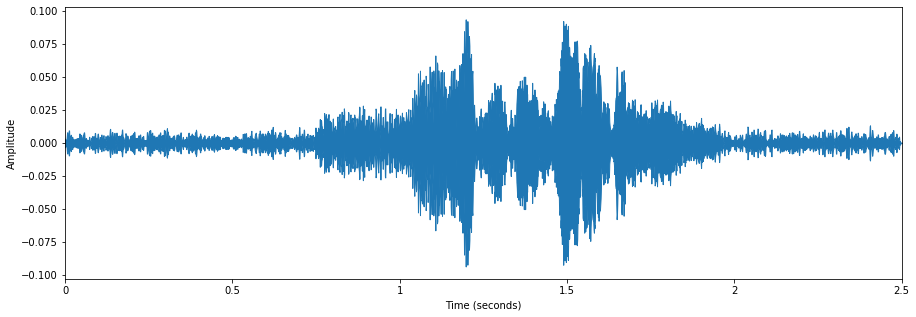

In [29]:
fname = 'AudioWAV/' + '1091_IOM_HAP_XX.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
librosa.display.waveplot(data, sr = sampling_rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

Audio(fname)

Original Duration:  2.5025396825396826 Trimmed Duration:  2.1565532879818594


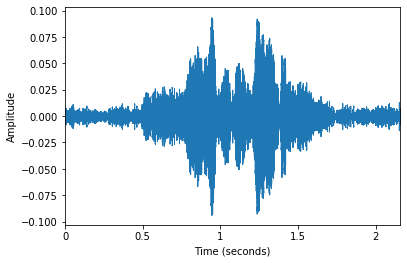

In [30]:
yt3, index3 = librosa.effects.trim(data, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
print('Original Duration: ', librosa.get_duration(data), 'Trimmed Duration: ', librosa.get_duration(yt3))

librosa.display.waveplot(yt3, sr = sampling_rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

sf.write('1091_IOM_HAP_XX_trim.wav', yt3, sampling_rate)
Audio(yt3, rate = sampling_rate)

However, this method seems to work fine with samples that have similar amount of beginning and trailing silence. Let's check other tracks whose beginning and trailing silence have failed to be removed using the common top_db threshold at 20 dB.

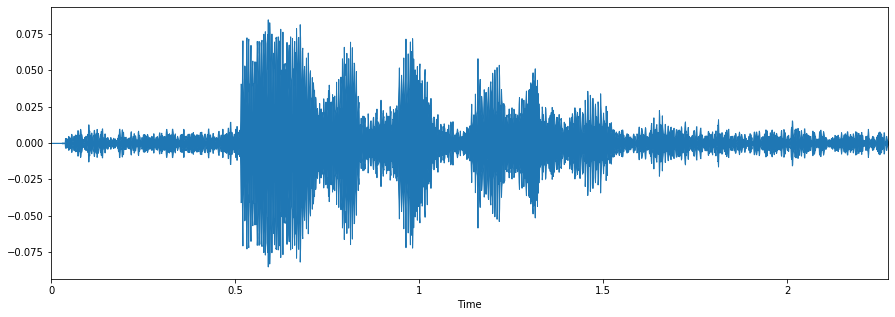

In [66]:
fname = 'AudioWAV/' + '1091_TIE_NEU_XX.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
librosa.display.waveplot(data, sr = sampling_rate)

Audio(fname)


In [67]:
yt, index = librosa.effects.trim(data, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
Audio(yt, rate = sampling_rate)

# for a track with more trailing silence than its beginning, 
# this new method unintentionally cuts off some of the ending part of the sentence.

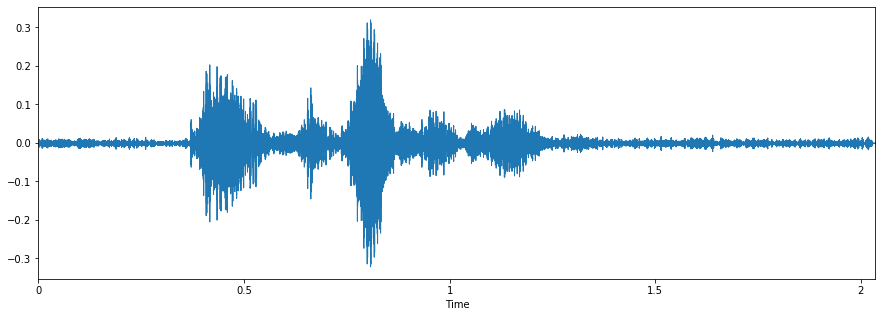

In [43]:
# track 5 which the original method failed to remove any beginning and trailing silence
fname = 'AudioWAV/' + '1001_DFA_NEU_XX.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
librosa.display.waveplot(data, sr = sampling_rate)

Audio(fname)

In [44]:
yt, index = librosa.effects.trim(data, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
Audio(yt, rate = sampling_rate)

# new method slightly cut off ending part of sentence, which is NOT ideal

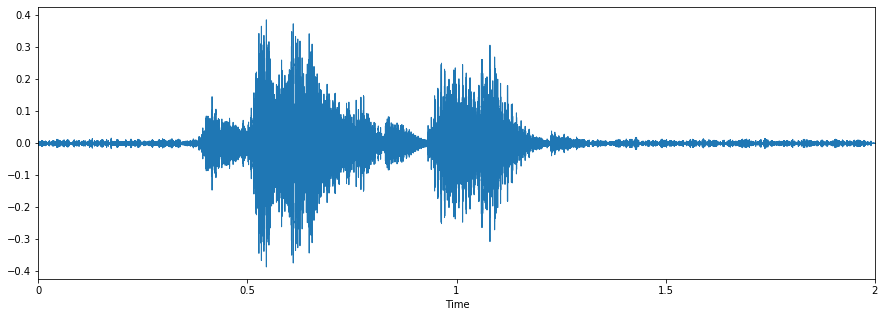

In [45]:
fname = 'AudioWAV/' + '1001_IEO_DIS_HI.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize = (15,5))
librosa.display.waveplot(data, sr = sampling_rate)

Audio(fname)

In [46]:
yt, index = librosa.effects.trim(data, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
Audio(yt, rate = sampling_rate)

# new method does an okay job for track 10

Silents at the middle of the audio is not a key problem for us since there is only one sentence being spoken in the recorded track.

## Visualize MFCC with a few examples

In [47]:
df_w_gender.loc[(df_w_gender.actor_id == 1034),:]

files  actor_id gender
2687  1034_DFA_ANG_XX.wav      1034   Male
2688  1034_DFA_DIS_XX.wav      1034   Male
2689  1034_DFA_FEA_XX.wav      1034   Male
2690  1034_DFA_HAP_XX.wav      1034   Male
2691  1034_DFA_NEU_XX.wav      1034   Male
...                   ...       ...    ...
2764  1034_WSI_DIS_XX.wav      1034   Male
2765  1034_WSI_FEA_XX.wav      1034   Male
2766  1034_WSI_HAP_XX.wav      1034   Male
2767  1034_WSI_NEU_XX.wav      1034   Male
2768  1034_WSI_SAD_XX.wav      1034   Male

[82 rows x 3 columns]

In [48]:
# gender - male; emotion - angry
oldest_mtrack = 'AudioWAV/' + '1034_TAI_ANG_XX.wav'
data, sampling_rate = librosa.load(oldest_mtrack)

Audio(data, rate = sampling_rate)

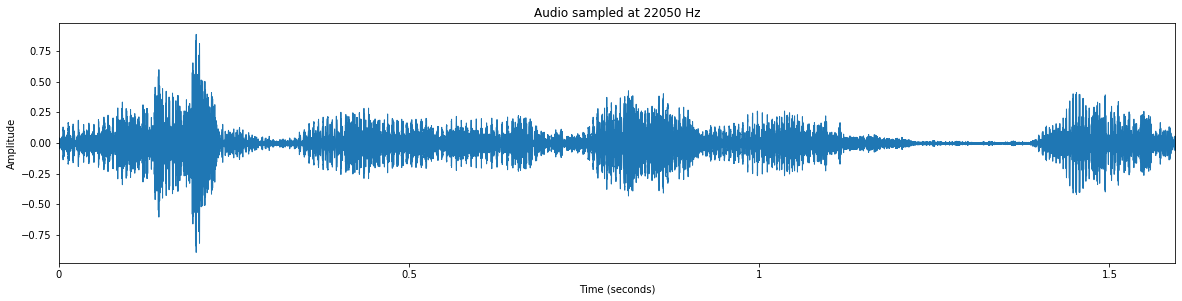

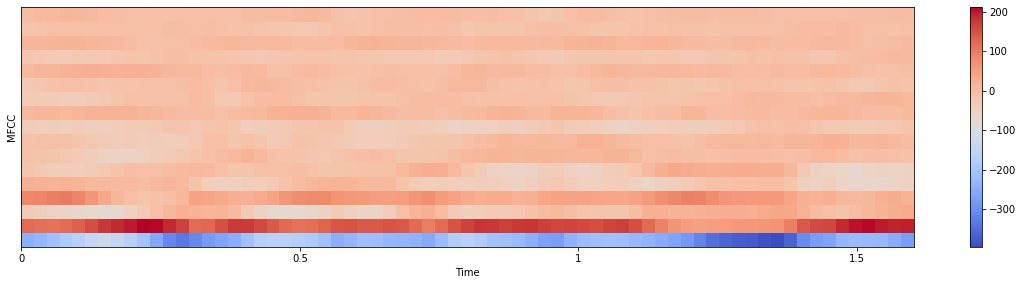

In [49]:
yt, index = librosa.effects.trim(data, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)

mfcc = librosa.feature.mfcc(yt, sr = sampling_rate, n_mfcc = 17)

# audio wave
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(yt, sr = sampling_rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio sampled at 22050 Hz')

# MFCC
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis = 'time')
plt.ylabel('MFCC')
plt.colorbar()

Audio(yt, rate = sampling_rate)

In [50]:
# gender - female; emotion - angry
oldest_ftrack = 'AudioWAV/' + '1020_TAI_ANG_XX.wav'
data, sampling_rate = librosa.load(oldest_ftrack)

Audio(data, rate = sampling_rate)

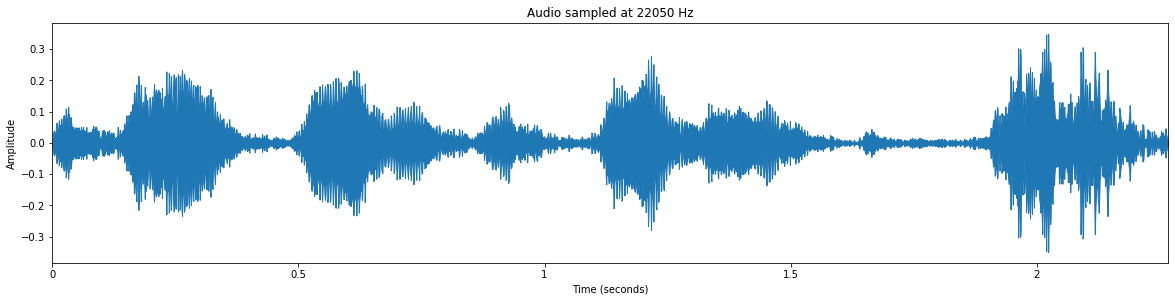

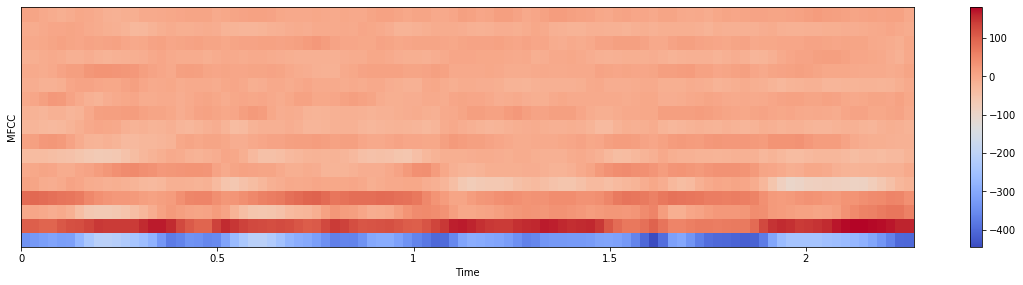

In [51]:
yt, index = librosa.effects.trim(data, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)

mfcc = librosa.feature.mfcc(yt, sr = sampling_rate, n_mfcc = 17)

# audio wave
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(yt, sr = sampling_rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio sampled at 22050 Hz')

# MFCC
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis = 'time')
plt.ylabel('MFCC')
plt.colorbar()

Audio(yt, rate = sampling_rate)

69
98


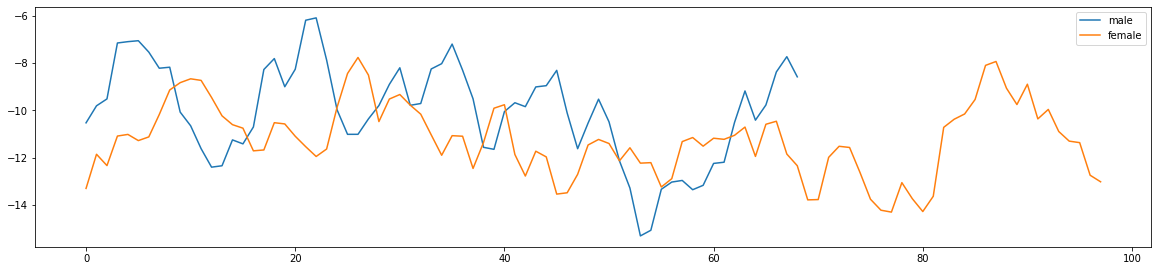

In [52]:
# gender - male; emotion - angry
oldest_mtrack = 'AudioWAV/' + '1034_TAI_ANG_XX.wav'
data_m, sampling_rate = librosa.load(oldest_mtrack)
yt_m, index = librosa.effects.trim(data_m, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
male = librosa.feature.mfcc(yt_m, sr = sampling_rate, n_mfcc = 17)
male = np.mean(librosa.feature.mfcc(yt_m, sr = sampling_rate, n_mfcc = 17), axis = 0)
print(len(male))

# gender - female; emotion - angry
oldest_ftrack = 'AudioWAV/' + '1020_TAI_ANG_XX.wav'
data_f, sampling_rate = librosa.load(oldest_ftrack)
yt_f, index = librosa.effects.trim(data_f, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
female = librosa.feature.mfcc(yt_f, sr = sampling_rate, n_mfcc = 17)
female = np.mean(librosa.feature.mfcc(yt_f, sr = sampling_rate, n_mfcc = 17), axis = 0)
print(len(female))

# audio wave
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
plt.plot(male, label = 'male')
plt.plot(female, label = 'female')
plt.legend()

In [75]:
# gender - male; emotion - happy
youngest_mtrack = 'AudioWAV/' + '1077_IWW_HAP_XX.wav'
data_m, sampling_rate = librosa.load(youngest_mtrack)

Audio(data_m, rate = sampling_rate)

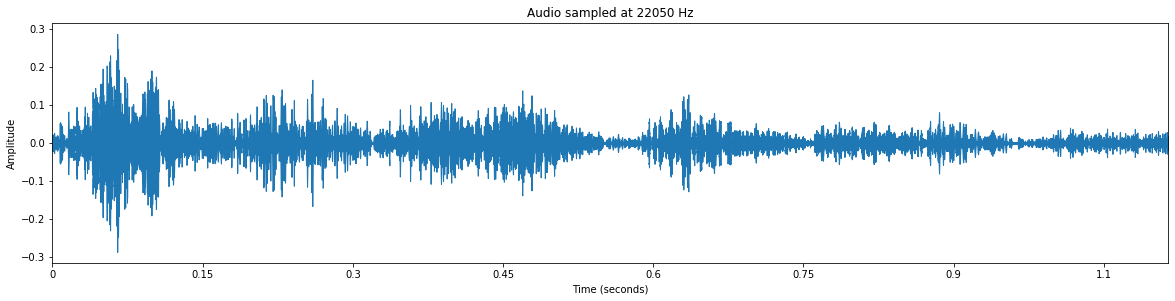

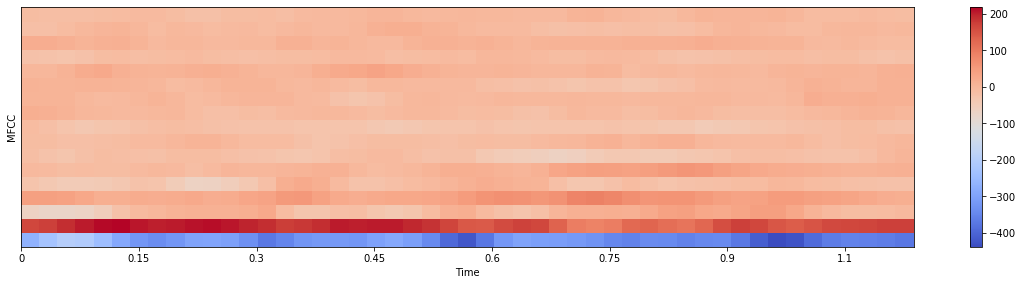

In [76]:
yt_m, index = librosa.effects.trim(data_m, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)

mfcc = librosa.feature.mfcc(yt_m, sr = sampling_rate, n_mfcc = 17)

# audio wave
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(yt_m, sr = sampling_rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio sampled at 22050 Hz')

# MFCC
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis = 'time')
plt.ylabel('MFCC')
plt.colorbar()

Audio(yt_m, rate = sampling_rate)

In [77]:
# gender - female; emotion - happy
youngest_ftrack = 'AudioWAV/' + '1082_IWW_HAP_XX.wav'
data_f, sampling_rate = librosa.load(youngest_ftrack)

Audio(youngest_ftrack)

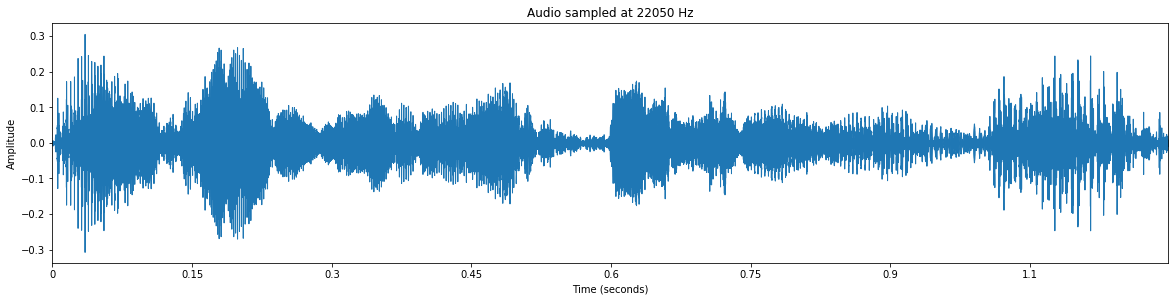

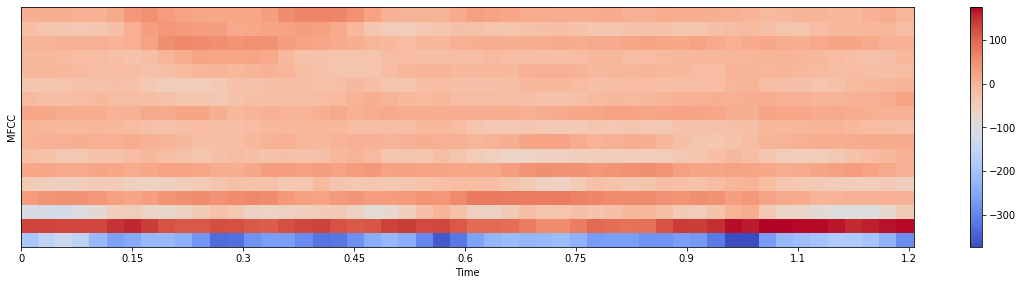

In [78]:
yt_f, index = librosa.effects.trim(data_f, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
mfcc = librosa.feature.mfcc(yt_f, sr = sampling_rate, n_mfcc = 17)

# audio wave
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(yt_f, sr = sampling_rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio sampled at 22050 Hz')

# MFCC
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis = 'time')
plt.ylabel('MFCC')
plt.colorbar()

Audio(yt_f, rate = sampling_rate)

49
52


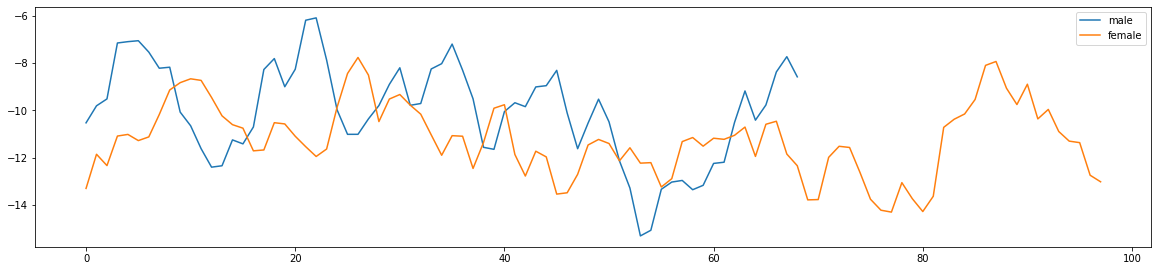

In [105]:
# gender - male; emotion - happy
youngest_mtrack = 'AudioWAV/' + '1077_IWW_HAP_XX.wav'
data_m, sampling_rate = librosa.load(youngest_mtrack)
youngest_m, index = librosa.effects.trim(data_m, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
y_male = librosa.feature.mfcc(youngest_m, sr = sampling_rate, n_mfcc = 17)
y_male = np.mean(librosa.feature.mfcc(youngest_m, sr = sampling_rate, n_mfcc = 17), axis = 0)
print(len(y_male))
sf.write('1077_IWW_HAP_XX_trim.wav', youngest_m, sampling_rate)

# gender - female; emotion - happy
youngest_ftrack = 'AudioWAV/' + '1082_IWW_HAP_XX.wav'
data_f, sampling_rate = librosa.load(youngest_ftrack)
youngest_f, index = librosa.effects.trim(data_f, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
y_female = librosa.feature.mfcc(youngest_f, sr = sampling_rate, n_mfcc = 17)
y_female = np.mean(librosa.feature.mfcc(youngest_f, sr = sampling_rate, n_mfcc = 17), axis = 0)
print(len(y_female))
sf.write('1082_IWW_HAP_XX_trim.wav', youngest_f, sampling_rate)

# audio wave
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
plt.plot(male, label = 'male')
plt.plot(female, label = 'female')
plt.legend()

In [ ]:
y_female = np.mean(librosa.feature.mfcc(youngest_f, sr = sampling_rate, n_mfcc = 17), axis = 0)
y_male = np.mean(librosa.feature.mfcc(youngest_m, sr = sampling_rate, n_mfcc = 17), axis = 0)
plt.figure(figsize = (20, 15))
plt.subplot(3,1,1)
plt.plot(male, label = 'male')
plt.plot(female, label = 'female')
plt.legend()

In [55]:

Audio(youngest_f, rate = sampling_rate)

In [56]:
Audio(youngest_m, rate = sampling_rate) # voice quality is not very good

## Generate features of audio file  using librosa

In [35]:
features_df = pd.DataFrame(columns = ['feature'])

col_num = 0
for index, y in enumerate(audio_list):
    X, sample_rate = librosa.load('AudioWAV/' + y, res_type = 'kaiser_fast')
    yt, index = librosa.effects.trim(X, top_db = 20, ref=np.max, frame_length = 256, hop_length = 64)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y = yt, sr = sample_rate, n_mfcc = 17), axis = 0)
    feature = mfccs
    features_df.loc[col_num] = [feature]
    col_num = col_num + 1

In [36]:
features_df[:5]

feature
0  [-9.620732, -6.468153, -5.9251103, -6.729927, ...
1  [-16.037386, -11.193971, -8.674429, -10.208759...
2  [-7.3261704, -6.8252673, -9.066109, -11.684609...
3  [-7.0111284, -5.996286, -5.341102, -7.025241, ...
4  [-13.13612, -11.512733, -10.22563, -9.838783, ...

In [37]:
df3 = pd.DataFrame(features_df['feature'].values.tolist())

In [38]:
df3

0          1          2          3          4          5    \
0     -9.620732  -6.468153  -5.925110  -6.729927  -8.394912 -12.471506   
1    -16.037386 -11.193971  -8.674429 -10.208759 -11.293220 -12.851307   
2     -7.326170  -6.825267  -9.066109 -11.684609 -12.352726 -11.807521   
3     -7.011128  -5.996286  -5.341102  -7.025241 -10.693501 -12.206599   
4    -13.136120 -11.512733 -10.225630  -9.838783  -9.236116 -11.287755   
...         ...        ...        ...        ...        ...        ...   
7437 -15.253578 -16.484241 -16.346027 -15.647058 -15.490385 -15.383217   
7438 -15.499027 -17.066147 -17.088671 -17.152666 -17.456833 -17.164446   
7439 -15.008453 -13.283313 -12.076385 -11.152529 -11.734528 -13.104960   
7440 -13.135741 -12.045264 -12.491942 -13.301993 -13.930367 -13.342509   
7441 -16.380104 -15.780040 -15.633675 -15.300456 -16.249022 -16.587936   

            6          7          8          9    ...  206  207  208  209  \
0    -13.474622 -14.074455 -13.747945 -12.962654  ...  NaN  NaN  NaN  NaN   
1    -12.869898 -12.397981 -12.449426 -14.081515  ...  NaN  NaN  NaN  NaN   
2    -11.920674 -10.837593 -11.293701 -12.753458  ...  NaN  NaN  NaN  NaN   
3    -13.182552 -13.513250 -12.829860 -13.151039  ...  NaN  NaN  NaN  NaN   
4    -15.745927 -17.706661 -18.655682 -16.432726  ...  NaN  NaN  NaN  NaN   
...         ...        ...        ...        ...  ...  ...  ...  ...  ...   
7437 -16.287655 -15.965490 -15.822451 -15.528412  ...  NaN  NaN  NaN  NaN   
7438 -18.117908 -17.336582 -16.132681 -16.416883  ...  NaN  NaN  NaN  NaN   
7439 -11.357128  -9.972752 -12.573499 -12.915426  ...  NaN  NaN  NaN  NaN   
7440 -12.908522 -12.128686 -11.751011 -12.220071  ...  NaN  NaN  NaN  NaN   
7441 -17.432760 -16.283672 -16.383135 -17.525187  ...  NaN  NaN  NaN  NaN   

      210  211  212  213  214  215  
0     NaN  NaN  NaN  NaN  NaN  NaN  
1     NaN  NaN  NaN  NaN  NaN  NaN  
2     NaN  NaN  NaN  NaN  NaN  NaN  
3     NaN  NaN  NaN  NaN  NaN  NaN  
4     NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  
7437  NaN  NaN  NaN  NaN  NaN  NaN  
7438  NaN  NaN  NaN  NaN  NaN  NaN  
7439  NaN  NaN  NaN  NaN  NaN  NaN  
7440  NaN  NaN  NaN  NaN  NaN  NaN  
7441  NaN  NaN  NaN  NaN  NaN  NaN  

[7442 rows x 216 columns]

In [40]:
df3.loc[:, df3.isna().any()]

22         23         24         25         26         27   \
0    -10.390495  -9.589014  -9.096365 -11.442370 -12.894919 -10.672577   
1    -15.569820 -13.948928 -12.978304 -13.136714 -13.469949 -12.674193   
2     -9.029117 -10.417979 -12.437694 -11.493572  -9.224200  -9.352602   
3    -10.297185 -11.563838  -9.931222 -10.067024 -13.860013 -15.488688   
4    -14.674390 -15.575035 -12.657026 -10.433773 -10.216531 -12.238955   
...         ...        ...        ...        ...        ...        ...   
7437 -13.527358 -12.599839 -12.444086 -11.794024 -13.833377 -13.426131   
7438 -14.456618 -14.562318 -15.156614 -17.750311 -18.143421 -15.428627   
7439 -12.505104 -12.053886 -12.230147 -13.940433 -13.459517 -12.770704   
7440 -13.997261 -11.315437 -10.666291 -13.080296 -14.712639 -13.544598   
7441 -12.799510 -11.781864 -12.544512 -12.530296 -13.101643 -14.248984   

            28         29         30         31   ...  206  207  208  209  \
0    -11.136299 -11.302346 -11.974903 -12.911626  ...  NaN  NaN  NaN  NaN   
1    -12.354605 -12.160397 -12.879433 -13.382253  ...  NaN  NaN  NaN  NaN   
2    -11.646558 -14.945462 -10.494062        NaN  ...  NaN  NaN  NaN  NaN   
3    -16.066864 -16.509356 -13.648606 -12.707853  ...  NaN  NaN  NaN  NaN   
4    -13.287238 -12.731968 -14.160478 -12.336888  ...  NaN  NaN  NaN  NaN   
...         ...        ...        ...        ...  ...  ...  ...  ...  ...   
7437 -12.825996 -12.183558 -11.312711 -11.364596  ...  NaN  NaN  NaN  NaN   
7438 -14.215828 -15.618239 -15.441516 -15.901180  ...  NaN  NaN  NaN  NaN   
7439 -13.645202 -13.066481 -13.480746 -12.465850  ...  NaN  NaN  NaN  NaN   
7440 -13.425163 -14.795958 -14.626091 -12.538216  ...  NaN  NaN  NaN  NaN   
7441 -12.625084 -11.362339 -11.412237 -11.926547  ...  NaN  NaN  NaN  NaN   

      210  211  212  213  214  215  
0     NaN  NaN  NaN  NaN  NaN  NaN  
1     NaN  NaN  NaN  NaN  NaN  NaN  
2     NaN  NaN  NaN  NaN  NaN  NaN  
3     NaN  NaN  NaN  NaN  NaN  NaN  
4     NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  
7437  NaN  NaN  NaN  NaN  NaN  NaN  
7438  NaN  NaN  NaN  NaN  NaN  NaN  
7439  NaN  NaN  NaN  NaN  NaN  NaN  
7440  NaN  NaN  NaN  NaN  NaN  NaN  
7441  NaN  NaN  NaN  NaN  NaN  NaN  

[7442 rows x 194 columns]

In [47]:
null_columns = df3.columns[df3.isna().any()]
df3[null_columns].isna().sum()

22        1
23        3
24        3
25        6
26        9
       ... 
211    7441
212    7441
213    7441
214    7441
215    7441
Length: 194, dtype: int64

In [56]:
records = df3.shape[0]
records

7442

In [60]:
# features with at least 80% of missing records are removed
# df3.loc[:, df3.isna().sum() < records*0.8]

#instead of removing null values, impute them as 0 for now
df3.fillna(0, inplace=True)

In [61]:
df3

0          1          2          3          4          5    \
0     -9.620732  -6.468153  -5.925110  -6.729927  -8.394912 -12.471506   
1    -16.037386 -11.193971  -8.674429 -10.208759 -11.293220 -12.851307   
2     -7.326170  -6.825267  -9.066109 -11.684609 -12.352726 -11.807521   
3     -7.011128  -5.996286  -5.341102  -7.025241 -10.693501 -12.206599   
4    -13.136120 -11.512733 -10.225630  -9.838783  -9.236116 -11.287755   
...         ...        ...        ...        ...        ...        ...   
7437 -15.253578 -16.484241 -16.346027 -15.647058 -15.490385 -15.383217   
7438 -15.499027 -17.066147 -17.088671 -17.152666 -17.456833 -17.164446   
7439 -15.008453 -13.283313 -12.076385 -11.152529 -11.734528 -13.104960   
7440 -13.135741 -12.045264 -12.491942 -13.301993 -13.930367 -13.342509   
7441 -16.380104 -15.780040 -15.633675 -15.300456 -16.249022 -16.587936   

            6          7          8          9    ...  206  207  208  209  \
0    -13.474622 -14.074455 -13.747945 -12.962654  ...  0.0  0.0  0.0  0.0   
1    -12.869898 -12.397981 -12.449426 -14.081515  ...  0.0  0.0  0.0  0.0   
2    -11.920674 -10.837593 -11.293701 -12.753458  ...  0.0  0.0  0.0  0.0   
3    -13.182552 -13.513250 -12.829860 -13.151039  ...  0.0  0.0  0.0  0.0   
4    -15.745927 -17.706661 -18.655682 -16.432726  ...  0.0  0.0  0.0  0.0   
...         ...        ...        ...        ...  ...  ...  ...  ...  ...   
7437 -16.287655 -15.965490 -15.822451 -15.528412  ...  0.0  0.0  0.0  0.0   
7438 -18.117908 -17.336582 -16.132681 -16.416883  ...  0.0  0.0  0.0  0.0   
7439 -11.357128  -9.972752 -12.573499 -12.915426  ...  0.0  0.0  0.0  0.0   
7440 -12.908522 -12.128686 -11.751011 -12.220071  ...  0.0  0.0  0.0  0.0   
7441 -17.432760 -16.283672 -16.383135 -17.525187  ...  0.0  0.0  0.0  0.0   

      210  211  212  213  214  215  
0     0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  
7437  0.0  0.0  0.0  0.0  0.0  0.0  
7438  0.0  0.0  0.0  0.0  0.0  0.0  
7439  0.0  0.0  0.0  0.0  0.0  0.0  
7440  0.0  0.0  0.0  0.0  0.0  0.0  
7441  0.0  0.0  0.0  0.0  0.0  0.0  

[7442 rows x 216 columns]

In [50]:
df3.shape

(7442, 216)

In [62]:
labeled_df = pd.concat([df3, labels_df], axis = 1)

In [63]:
labeled_df

0          1          2          3          4          5  \
0     -9.620732  -6.468153  -5.925110  -6.729927  -8.394912 -12.471506   
1    -16.037386 -11.193971  -8.674429 -10.208759 -11.293220 -12.851307   
2     -7.326170  -6.825267  -9.066109 -11.684609 -12.352726 -11.807521   
3     -7.011128  -5.996286  -5.341102  -7.025241 -10.693501 -12.206599   
4    -13.136120 -11.512733 -10.225630  -9.838783  -9.236116 -11.287755   
...         ...        ...        ...        ...        ...        ...   
7437 -15.253578 -16.484241 -16.346027 -15.647058 -15.490385 -15.383217   
7438 -15.499027 -17.066147 -17.088671 -17.152666 -17.456833 -17.164446   
7439 -15.008453 -13.283313 -12.076385 -11.152529 -11.734528 -13.104960   
7440 -13.135741 -12.045264 -12.491942 -13.301993 -13.930367 -13.342509   
7441 -16.380104 -15.780040 -15.633675 -15.300456 -16.249022 -16.587936   

              6          7          8          9  ...  207  208  209  210  \
0    -13.474622 -14.074455 -13.747945 -12.962654  ...  0.0  0.0  0.0  0.0   
1    -12.869898 -12.397981 -12.449426 -14.081515  ...  0.0  0.0  0.0  0.0   
2    -11.920674 -10.837593 -11.293701 -12.753458  ...  0.0  0.0  0.0  0.0   
3    -13.182552 -13.513250 -12.829860 -13.151039  ...  0.0  0.0  0.0  0.0   
4    -15.745927 -17.706661 -18.655682 -16.432726  ...  0.0  0.0  0.0  0.0   
...         ...        ...        ...        ...  ...  ...  ...  ...  ...   
7437 -16.287655 -15.965490 -15.822451 -15.528412  ...  0.0  0.0  0.0  0.0   
7438 -18.117908 -17.336582 -16.132681 -16.416883  ...  0.0  0.0  0.0  0.0   
7439 -11.357128  -9.972752 -12.573499 -12.915426  ...  0.0  0.0  0.0  0.0   
7440 -12.908522 -12.128686 -11.751011 -12.220071  ...  0.0  0.0  0.0  0.0   
7441 -17.432760 -16.283672 -16.383135 -17.525187  ...  0.0  0.0  0.0  0.0   

      211  212  213  214  215    label  
0     0.0  0.0  0.0  0.0  0.0    Angry  
1     0.0  0.0  0.0  0.0  0.0  Disgust  
2     0.0  0.0  0.0  0.0  0.0     Fear  
3     0.0  0.0  0.0  0.0  0.0    Happy  
4     0.0  0.0  0.0  0.0  0.0  Neutral  
...   ...  ...  ...  ...  ...      ...  
7437  0.0  0.0  0.0  0.0  0.0  Disgust  
7438  0.0  0.0  0.0  0.0  0.0     Fear  
7439  0.0  0.0  0.0  0.0  0.0    Happy  
7440  0.0  0.0  0.0  0.0  0.0  Neutral  
7441  0.0  0.0  0.0  0.0  0.0      Sad  

[7442 rows x 217 columns]

In [64]:
labeled_df.to_csv('data.csv', index=False)